In [72]:
import geopandas as gpd
import vaex
import pandas as pd
import numpy as np

In [73]:
# atributo = 'TO médio'
ano = [1995, 2004]
EXERCICIO = 2004

In [74]:
gdf_distritos = gpd.read_file('data/SIRGAS_GPKG_distrito.gpkg')

In [75]:
distrito = gdf_distritos[gdf_distritos.ds_codigo == '90']

In [76]:
distrito.ds_codigo.values[0]

'90'

In [77]:
path = f'lotes_agregados_por_ano/{ano[-1]}/SIRGAS_SHP_LOTES_{distrito.iloc[0].ds_codigo.rjust(2, "0")}_{distrito.iloc[0].ds_nome.replace(" ", "_")}_IPTU_{ano[-1]}.gpkg'
gdf_lote = gpd.read_file(path).drop_duplicates(subset=['sqlc']).set_index('sqlc')

<AxesSubplot:>

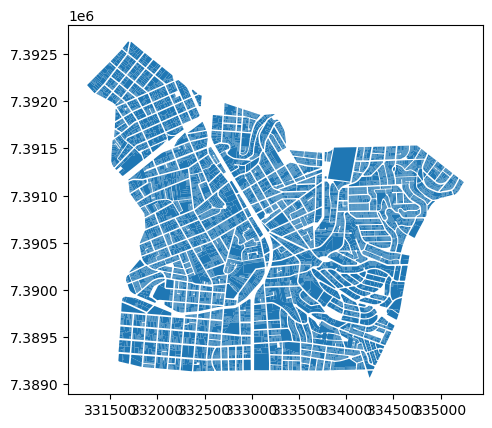

In [78]:
gdf_lote.plot()

In [79]:
gdf_lote

,sq,agregado,geometry
sqlc,,,
037083000006,037083,False,"POLYGON ((332904.860 7390044.150, 332900.337 7..."
037083000004,037083,False,"POLYGON ((332838.721 7390116.947, 332839.550 7..."
037083060100,037083,False,"POLYGON ((332771.440 7390130.120, 332778.480 7..."
039076000003,039076,False,"POLYGON ((333384.788 7390476.633, 333383.111 7..."
038053000006,038053,False,"POLYGON ((333182.830 7391765.482, 333183.358 7..."
...,...,...,...
042189000000,042189,True,"POLYGON ((334317.077 7389590.257, 334312.635 7..."
042190000000,042190,True,"POLYGON ((334344.190 7389684.585, 334348.639 7..."
042191000000,042191,True,"MULTIPOLYGON (((334076.207 7389603.954, 334076..."


In [81]:
df_iptu = vaex.open(f'data/por_distritos/IPTU-1995-2023-agrupados-por-sqlc-{distrito.ds_codigo.iloc[0]}-{distrito.ds_nome.iloc[0].replace(" ", "-").lower()}.hdf5').to_pandas_df().set_index('sqlc')

In [82]:
df_iptu.shape

(493185, 47)

In [83]:
df_iptu = df_iptu.loc[df_iptu.ano == EXERCICIO]

In [84]:
df_iptu.shape

(17339, 47)

In [85]:
gdf_lote.join(df_iptu, how='inner').shape

(15543, 50)

In [86]:
df_iptu.join(gdf_lote, how='left').sq.isna().value_counts()

False    15543
True      1796
Name: sq, dtype: int64

In [87]:
lotes_existentes = gdf_lote.join(df_iptu, how='inner')

In [88]:
lotes_existentes.shape

(15543, 50)

In [89]:
lotes_sg = df_iptu.join(gdf_lote, how='left').sq.isna()

In [90]:
lotes_sg.value_counts()

False    15543
True      1796
Name: sq, dtype: int64

In [91]:
df_iptu[lotes_sg].reset_index().sqlc

0       034079000200
1       036035001800
2       036039001000
3       037038008600
4       037053003100
            ...     
1791    037057001600
1792    036020000002
1793    036003137200
1794    037040126700
1795    037067045200
Name: sqlc, Length: 1796, dtype: object

In [92]:
gdf_lote.join(df_iptu, how='right').is_valid.value_counts()

True     15543
False     1796
dtype: int64

In [93]:
df_lotes_sg = df_iptu[lotes_sg].reset_index()

In [94]:
df_lotes_sg.shape

(1796, 48)

In [95]:
df_lotes_sg

,sqlc,ano,Quantidade de Unidades,Quantidade de Unidades Condominiais,Tamanho Médio da Unidade Condominial,Tamanho médio dos Terrenos,Área Total dos terrenos-lotes,Área Total Ocupada,Área Total Construída,Valor Total dos Terrenos,...,Residencial horizontal Médio (qt),Residencial horizontal Alto (qt),Comercial vertical Baixo (qt),Comercial vertical Médio (qt),Comercial vertical Alto (qt),Comercial horizontal Baixo (qt),Comercial horizontal Alto (qt),Comercial horizontal Médio (qt),Terreno (qt),Outros Usos (qt)
0,034079000200,2004,1,0,NaN,390.0,390,180,864,283920.0,...,0,0,1,0,0,0,0,0,0,0
1,036035001800,2004,1,0,NaN,146.0,146,115,115,192428.0,...,0,0,0,0,0,1,0,0,0,0
2,036039001000,2004,1,0,NaN,500.0,500,340,681,659000.0,...,0,0,0,0,0,1,0,0,0,0
3,037038008600,2004,1,0,NaN,396.0,396,100,200,247104.0,...,0,0,0,0,0,0,0,1,0,0
4,037053003100,2004,1,0,NaN,104.0,104,100,197,63856.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,037057001600,2004,1,0,NaN,422.0,422,320,600,317344.0,...,0,0,0,0,0,0,0,1,0,0
1792,036020000002,2004,2,2,125.5,237.0,474,264,251,584916.0,...,0,0,2,0,0,0,0,0,0,0
1793,036003137200,2004,1,0,NaN,1289.0,1289,0,0,1700191.0,...,0,0,0,0,0,0,0,0,0,0
1794,037040126700,2004,1,0,NaN,500.0,500,100,100,306500.0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
df_lotes_sg.sqlc = df_lotes_sg.sqlc.str[:6] + '0000' + df_lotes_sg.sqlc.str[-2:]

In [97]:
df_lotes_sg.sqlc.str[-6:]

0       000000
1       000000
2       000000
3       000000
4       000000
         ...  
1791    000000
1792    000002
1793    000000
1794    000000
1795    000000
Name: sqlc, Length: 1796, dtype: object

In [98]:
agg_atributos = {
        'Quantidade de Unidades':'sum',
        'Quantidade de Unidades Condominiais':'sum',
        'Tamanho Médio da Unidade Condominial':'mean',
        'Tamanho médio dos Terrenos':'mean',
        'Área Total dos terrenos-lotes':'sum',
        'Área Total Ocupada':'sum',
        'Área Total Construída':'sum',
        'Valor Total dos Terrenos':'sum',
        'Valor Total das Construções':'sum',
        'CA médio':'mean',
        'TO médio':'mean',
        'CA médio em lotes condominiais':'mean',
        'TO médio em lotes condominiais':'mean',
        'CA médio em lotes não condominiais':'mean',
        'TO médio em lotes não condominiais':'mean',
        'Comprimento Médio da Testada':'mean',
        'Número médio de Pavimentos':'mean',
        'Fator de obsolecência médio':'mean',
        'Residencial vertical Baixo (m2)':'sum',
        'Residencial vertical Médio (m2)':'sum',
        'Residencial vertical Alto (m2)':'sum',
        'Residencial horizontal Baixo (m2)':'sum',
        'Residencial horizontal Médio (m2)':'sum',
        'Residencial horizontal Alto (m2)':'sum',
        'Comercial vertical Baixo (m2)':'sum',
        'Comercial vertical Médio (m2)':'sum',
        'Comercial vertical Alto (m2)':'sum',
        'Comercial horizontal Baixo (m2)':'sum',
        'Comercial horizontal Alto (m2)':'sum',
        'Comercial horizontal Médio (m2)':'sum',
        'Terreno (m2)':'sum',
        'Outros Usos (m2)':'sum',
        'Residencial vertical Baixo (qt)':'sum',
        'Residencial vertical Médio (qt)':'sum',
        'Residencial vertical Alto (qt)':'sum',
        'Residencial horizontal Baixo (qt)':'sum',
        'Residencial horizontal Médio (qt)':'sum',
        'Residencial horizontal Alto (qt)':'sum',
        'Comercial vertical Baixo (qt)':'sum',
        'Comercial vertical Médio (qt)':'sum',
        'Comercial vertical Alto (qt)':'sum',
        'Comercial horizontal Baixo (qt)':'sum',
        'Comercial horizontal Alto (qt)':'sum',
        'Comercial horizontal Médio (qt)':'sum',
        'Terreno (qt)':'sum',
        'Outros Usos (qt)':'sum'
}

In [99]:
df_lotes_sg_group = df_lotes_sg.groupby('sqlc').agg(agg_atributos)

In [100]:
df_lotes_sg_group.shape

(304, 46)

In [101]:
lotes_agregados = gdf_lote.join(df_lotes_sg_group, how='right')

In [102]:
lotes_agregados.shape

(304, 49)

<AxesSubplot:>

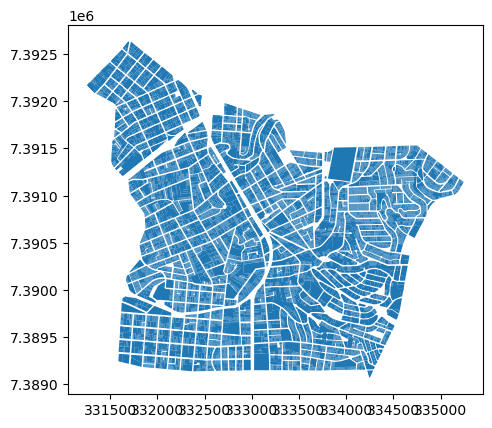

In [104]:
pd.concat([lotes_agregados, gdf_lote]).plot()

In [61]:
lotes_existentes.to_file('seila.gpkg', driver='GPKG')

In [77]:
df_iptu_bruto = vaex.open("data/IPTU-HDF5/IPTU_2023/IPTU_2023.hdf5")

In [ ]:
df_iptu_bruto['sq']

In [80]:
df_iptu_bruto[df_iptu_bruto["NUMERO DO CONTRIBUINTE"].str.startswith('0370170031')]

#,NUMERO DO CONTRIBUINTE,ANO DO EXERCICIO,NUMERO DA NL,DATA DO CADASTRAMENTO,NUMERO DO CONDOMINIO,CODLOG DO IMOVEL,NOME DE LOGRADOURO DO IMOVEL,NUMERO DO IMOVEL,COMPLEMENTO DO IMOVEL,BAIRRO DO IMOVEL,REFERENCIA DO IMOVEL,CEP DO IMOVEL,QUANTIDADE DE ESQUINAS FRENTES,FRACAO IDEAL,AREA DO TERRENO,AREA CONSTRUIDA,AREA OCUPADA,VALOR DO M2 DO TERRENO,VALOR DO M2 DE CONSTRUCAO,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,TESTADA PARA CALCULO,TIPO DE USO DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,FATOR DE OBSOLESCENCIA,ANO DE INICIO DA VIDA DO CONTRIBUINTE,MES DE INICIO DA VIDA DO CONTRIBUINTE,FASE DO CONTRIBUINTE
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [81]:
df_iptu

,ano,Quantidade de Unidades,Quantidade de Unidades Condominiais,Tamanho Médio da Unidade Condominial,Tamanho médio dos Terrenos,Área Total dos terrenos-lotes,Área Total Ocupada,Área Total Construída,Valor Total dos Terrenos,Valor Total das Construções,...,Residencial horizontal Médio (qt),Residencial horizontal Alto (qt),Comercial vertical Baixo (qt),Comercial vertical Médio (qt),Comercial vertical Alto (qt),Comercial horizontal Baixo (qt),Comercial horizontal Alto (qt),Comercial horizontal Médio (qt),Terreno (qt),Outros Usos (qt)
sqlc,,,,,,,,,,,,,,,,,,,,,
034077004500,1995,1,0,NaN,79.0,79,56,101,12008.0,18180.0,...,1,0,0,0,0,0,0,0,0,0
034077004500,1996,1,0,NaN,79.0,79,56,101,19671.0,23432.0,...,1,0,0,0,0,0,0,0,0,0
034077004500,1997,1,0,NaN,79.0,79,56,101,21646.0,25755.0,...,1,0,0,0,0,0,0,0,0,0
034077004500,1998,1,0,NaN,79.0,79,56,101,22831.0,27169.0,...,1,0,0,0,0,0,0,0,0,0
034077004500,1999,1,0,NaN,79.0,79,56,101,23226.0,27573.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
042071018400,2020,1,0,NaN,648.0,648,224,447,2118312.0,1006644.0,...,0,0,0,0,0,0,0,1,0,0
042071018400,2021,1,0,NaN,648.0,648,224,447,2118312.0,1006644.0,...,0,0,0,0,0,0,0,1,0,0
042071018400,2022,1,0,NaN,648.0,648,224,447,3499200.0,1168458.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
gdf_lote.to_crs(epsg=4674, inplace=True)
gdf_lote = gdf_lote[gdf_lote.is_valid]

# Abrindo arquivo com os dados agregados de IPTU por lote (SQLC)
df_iptu = vaex.open(f'data/por_distritos/IPTU-1995-{EXERCICIO}-agrupados-por-sqlc-{distrito.ds_codigo}-{distrito.ds_nome.replace(" ", "-").lower()}.hdf5').to_pandas_df().set_index('sqlc')


In [6]:
gdf_lote = gpd.read_file(path).drop_duplicates(subset=['sqlc']).set_index('sqlc')
gdf_lote = gdf_lote[gdf_lote.is_valid]

In [7]:
df_iptu = vaex.open(f'data/por_distritos/IPTU-1995-2022-agrupados-por-sqlc-{distrito.iloc[0].ds_codigo.rjust(2, "0")}-{distrito.iloc[0].ds_nome.replace(" ", "-").lower()}.hdf5').to_pandas_df().set_index('sqlc')
df_iptu_ano = df_iptu[df_iptu.ano == ano[0]]

In [8]:
df_iptu[(df_iptu.ano >= ano[0]) & (df_iptu.ano <= ano[-1])][['ano', atributo]].reset_index()#.pivot(index='sqlc', columns='ano', values=atributo)

,sqlc,ano,TO médio
0,034077004500,1995,0.708861
1,034077004500,1996,0.708861
2,034077004500,1997,0.708861
3,034077004500,1998,0.708861
4,034077004500,1999,0.708861
...,...,...,...
477205,042071018400,2018,0.345679
477206,042071018400,2019,0.345679
477207,042071018400,2020,0.345679
477208,042071018400,2021,0.345679


In [9]:
df_iptu_ano.shape, gdf_lote.shape

((18176, 47), (15209, 3))

In [10]:
np.unique(df_iptu_ano.index.duplicated()), np.unique(gdf_lote.index.duplicated(), return_counts=True)

(array([False]), (array([False]), array([15209])))

In [11]:
## Lotes existentes no IPTU no ano escolhido e com geometria do lote
lotes_existentes = gdf_lote.join(df_iptu_ano, how='inner')

In [12]:
# Lotes sem geometria que foram desmembrados ou remembrados e pprecisam ser agregados
lotes_sg = df_iptu_ano.join(gdf_lote, how='left').sq.isna()
df_lotes_sg = df_iptu_ano[lotes_sg].reset_index()

In [13]:
df_lotes_sg.sqlc = df_lotes_sg.sqlc.str[:6] + '000000'
df_lotes_sg_group = df_lotes_sg.groupby('sqlc').agg(
    {'ano':'first',
    'Quantidade de Unidades':'sum',
    'Quantidade de Unidades Condominiais':'sum',
    'Tamanho Médio da Unidade Condominial':'mean',
    'Tamanho médio dos Terrenos':'mean',
    'Área Total dos terrenos-lotes':'sum',
    'Área Total Ocupada':'sum',
    'Área Total Construída':'sum',
    'Valor Total dos Terrenos':'sum',
    'Valor Total das Construções':'sum',
    'CA médio':'mean',
    'TO médio':'mean',
    'CA médio em lotes condominiais':'mean',
    'TO médio em lotes condominiais':'mean',
    'CA médio em lotes não condominiais':'mean',
    'TO médio em lotes não condominiais':'mean',
    'Comprimento Médio da Testada':'mean',
    'Número médio de Pavimentos':'mean',
    'Fator de obsolecência médio':'mean',
    'Residencial':'mean',
    'Comercial':'mean',
    'Serviços':'mean',
    'Industrial':'mean',
    'Outros':'mean',
    'Percentual de Uso Residencial':'mean',
    'Percentual de Uso Comercial':'mean',
    'Percentual de Uso Serviços':'mean',
    'Percentual de Uso Industrial':'mean',
    'Percentual de Uso Outros':'mean'}
)
# df_lotes_sg.set_index('sqlc')

KeyError: "Column(s) ['Comercial', 'Industrial', 'Outros', 'Percentual de Uso Comercial', 'Percentual de Uso Industrial', 'Percentual de Uso Outros', 'Percentual de Uso Residencial', 'Percentual de Uso Serviços', 'Residencial', 'Serviços'] do not exist"

In [18]:
# Agora com as geometrias
lotes_agregados = gdf_lote.join(df_lotes_sg_group, how='inner')

In [19]:
lotes_existentes.shape, lotes_agregados.shape

((14834, 32), (355, 32))

<AxesSubplot:>

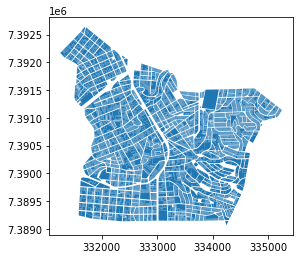

In [22]:
pd.concat([lotes_existentes, lotes_agregados])